# **ASSIGNMENT 3**

# Feature Information

*   sex: sex (1 = male; 0 = female)
*   cp: chest pain type — Value 1: typical angina — Value 2: atypical angina — Value 3: non-anginal pain — Value 4: asymptomatic
*   trestbps: resting blood pressure (in mm Hg on admission to the hospital)
*   chol: serum cholestoral in mg/dl
*   fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*   restecg: resting electrocardiographic results — Value 0: normal — Value 1: having ST-T wave abnormality Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria 20 ekgmo
*   thalach: maximum heart rate achieved
*   exang: exercise induced angina (1 = yes; 0 = no)
*   oldpeak = ST depression induced by exercise relative to rest
*   slope: the slope of the peak exercise ST segment — Value 1: upsloping — Value 2: flat — Value 3: downsloping
*   ca: number of major vessels (0–3) colored by flourosopy
*   thal: thalassemia — 3 = normal; 6 = fixed defect; 7 = reversable defect
*   target: 0(no presence) 1(presence)

# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Dataframe

In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.shape

(1025, 14)

# Data Preparation

### Deteksi Missing Value

In [ ]:
# Mengecek missing value pada tiap feature
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Mengidentifikasi data duplikat

In [ ]:
duplicate = df.duplicated().sum()
if duplicate:
    print('Duplicate rows in dataset are : {}'.format(duplicate))
else:
    print('Dataset contains no duplicate values')

Duplicate rows in dataset are : 723


In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [ ]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
sort_duplicate = df.sort_values(by='age', ascending=True).tail(10)
sort_duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
500,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
313,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
724,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
590,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
535,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
99,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
965,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
160,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
162,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
387,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


### Menghapus data duplikat

In [ ]:
df_no_dup = df.drop_duplicates()

In [ ]:
df_no_dup.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
723    False
733    False
739    False
843    False
878    False
Length: 302, dtype: bool

In [ ]:
df_no_dup

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


### Deteksi Outlier

In [ ]:
df_no_dup.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

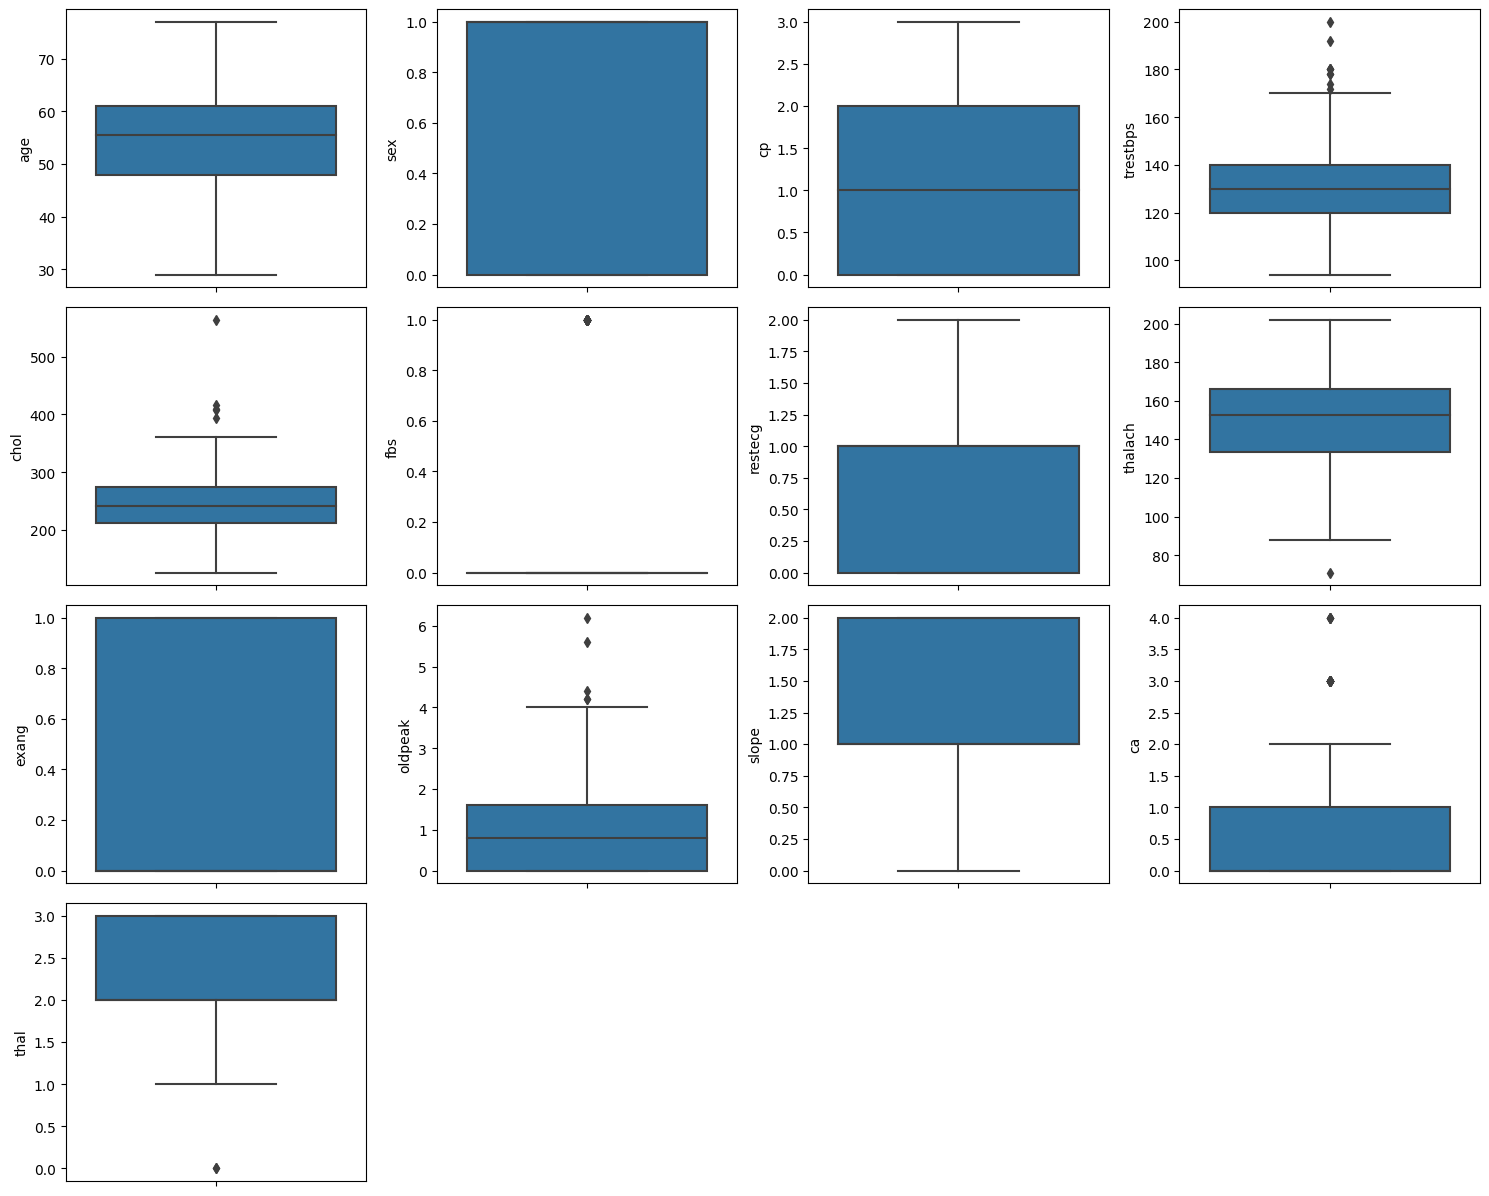

In [ ]:
df1 = df_no_dup.drop('target', axis = 1)
fig = plt.figure(figsize=(15,15))
for i in range(len(df1.columns)):
    fig.add_subplot(5,4,i+1)
    sns.boxplot(y=df1.iloc[:,i])

plt.tight_layout()
plt.show()

In [ ]:
# define continuous variable & plot
continous_features = ['age','trestbps','chol','thalach','oldpeak']
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df_no_dup.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df_no_dup[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


In [ ]:
outliers(df_no_dup[continous_features], drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


<ipython-input-16-0d12505a6875>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dup.drop(outliers, inplace = True, errors = 'ignore')
<ipython-input-16-0d12505a6875>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dup.drop(outliers, inplace = True, errors = 'ignore')
<ipython-input-16-0d12505a6875>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dup.drop(outliers, inplace = True, errors = 'ignore')
<ipython-inpu

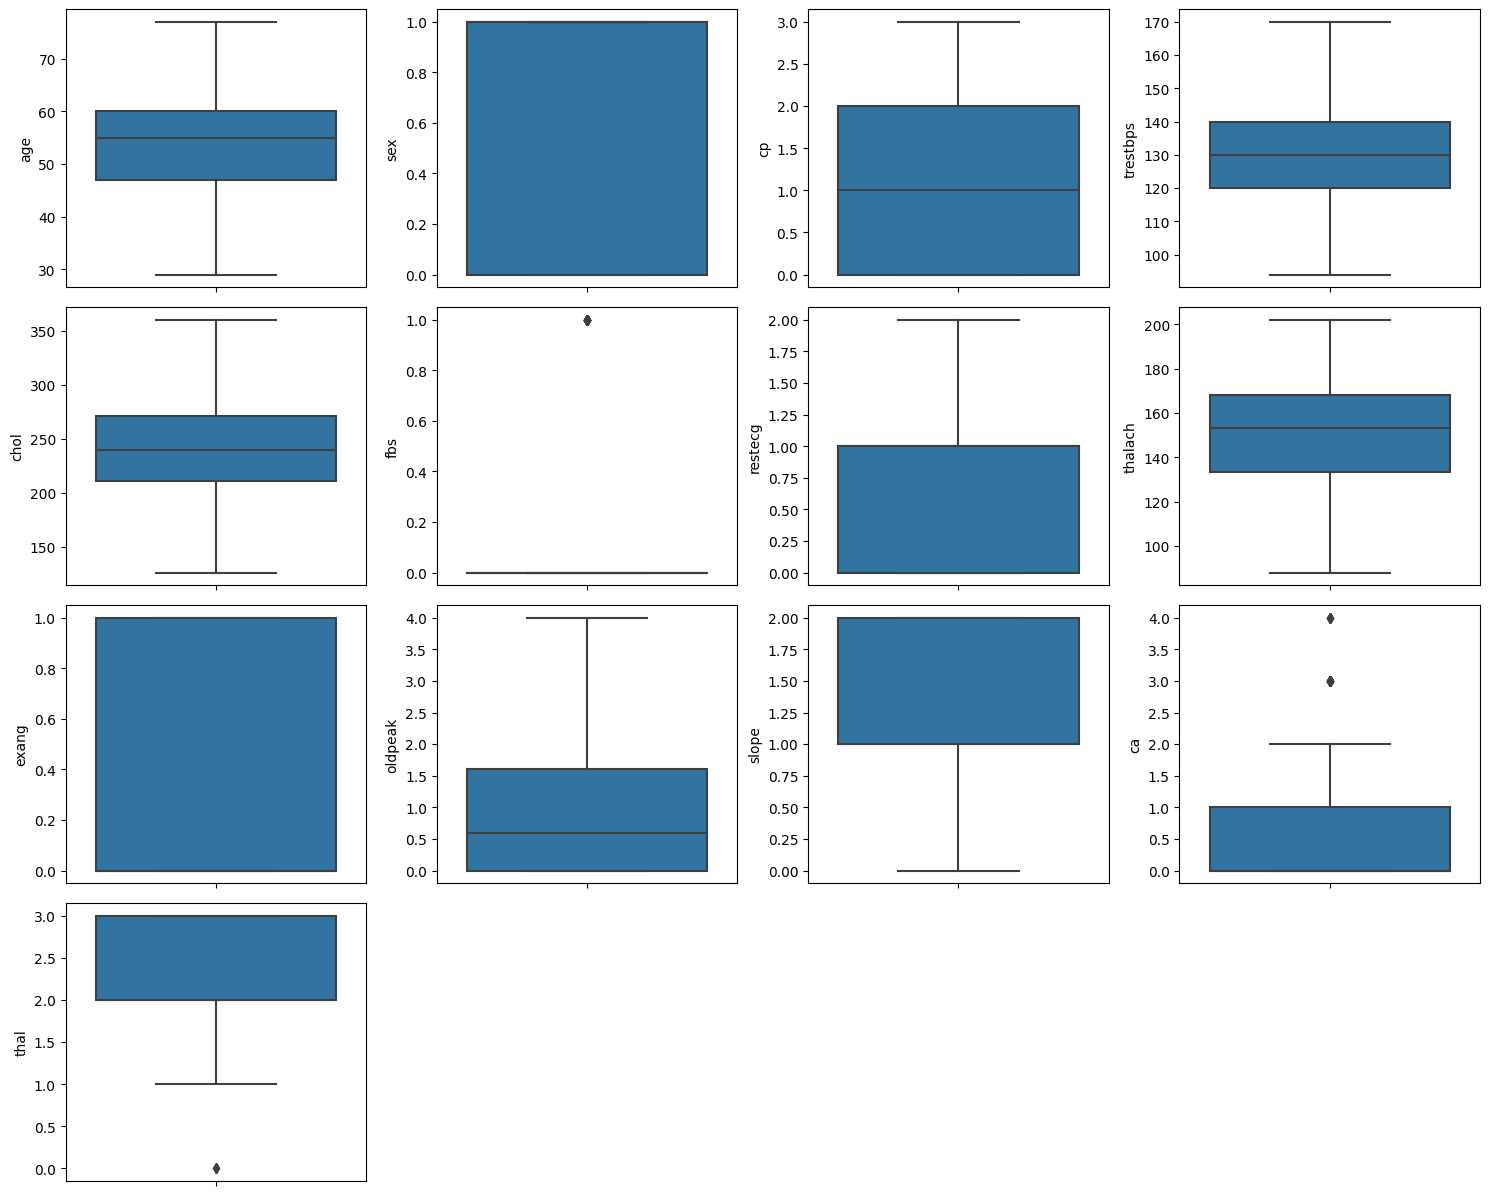

In [ ]:
df2 = df_no_dup.drop('target', axis = 1)
fig = plt.figure(figsize=(15,15))
for i in range(len(df2.columns)):
    fig.add_subplot(5,4,i+1)
    sns.boxplot(y=df2.iloc[:,i])

plt.tight_layout()
plt.show()

# Feature Engineering

In [ ]:
df_new = pd.DataFrame(df2)
df_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [ ]:
# Ambang batas untuk menentukan tingkat kolesterol normal atau tidak
ambang_batas = 200

# Membuat kolom baru 'clevel_indicator' yang merupakan variabel biner (0 atau 1)
# 1 menunjukkan tingkat kolesterol tidak normal (di atas ambang batas), 0 menunjukkan tingkat kolesterol normal
df_new['clevel_indicator'] = df['chol'].apply(lambda x: 1 if x > ambang_batas else 0)

# Menampilkan DataFrame setelah feature engineering
print(df_new)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  clevel_indicator  
0        2   2     3                 1  
1    

In [ ]:
# Ambang batas untuk kategori tekanan darah
batas_normal = 120
batas_tinggi = 140

# Membuat kolom baru 'trestbps_category' untuk menyimpan kategori tekanan darah
# 0: Normal, 1: Tinggi, 2: Hipertensi
df_new['trestbps_category'] = df_new['trestbps'].apply(lambda x: 0 if x < batas_normal else (1 if x < batas_tinggi else 2))

# Menampilkan DataFrame setelah feature engineering
print(df_new)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  clevel_indicator  trestbps_category  
0        2   2     3       

In [ ]:
# Kategori: Rendah (<= 130), Sedang (131-160), Tinggi (> 160)
batas_rendah = 130
batas_tinggi = 160

# Membuat kolom baru 'thalach_level' yang merupakan kategori detak jantung maksimum
df_no_dup['t_level'] = df_no_dup['thalach'].apply(lambda x: 'Rendah' if x <= batas_rendah else ('Sedang' if x <= batas_tinggi else 'Tinggi'))

# Menampilkan DataFrame setelah feature engineering
print(df_no_dup)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target t_level  
0        2   2     3       0  Tinggi  
1        

<ipython-input-22-9d6e8818a650>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dup['t_level'] = df_no_dup['thalach'].apply(lambda x: 'Rendah' if x <= batas_rendah else ('Sedang' if x <= batas_tinggi else 'Tinggi'))


In [ ]:
df_no_dup['blood_sugar_electrocardiogram'] = df_no_dup['fbs'] * df_no_dup['restecg']

# Menampilkan DataFrame setelah feature engineering
print(df_no_dup)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target t_level  blood_sugar_electrocardiogram  
0        2   2   

<ipython-input-23-df62b0ea5b82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dup['blood_sugar_electrocardiogram'] = df_no_dup['fbs'] * df_no_dup['restecg']


# EDA & Visualization

### Statistics Summary

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,54.049470,0.699647,0.985866,129.883392,242.314488,0.141343,0.522968,149.961131,0.318021,0.951943,1.427562,0.696113,2.296820
std,9.128186,0.459224,1.031324,15.387795,44.654188,0.348992,0.514336,22.691625,0.466533,1.026400,0.599246,0.985472,0.610392
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000
75%,60.000000,1.000000,2.000000,140.000000,270.500000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000


### Distributions and Relationship

1    158
0    125
Name: target, dtype: int64


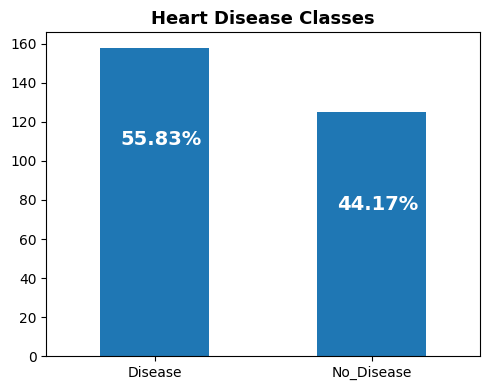

In [ ]:
print(df_no_dup.target.value_counts())

fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No_Disease"]
ax = df_no_dup.target.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')

plt.tight_layout()

1    713
0    312
Name: sex, dtype: int64


Text(0.5, 1.0, 'sex Distribution')

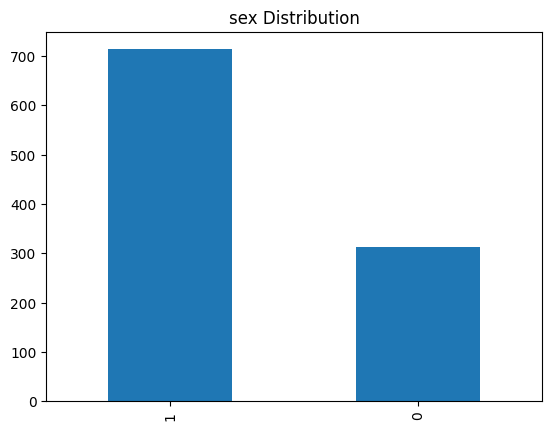

In [ ]:
print(df.sex.value_counts())
df['sex'].value_counts().plot(kind='bar').set_title('sex Distribution')

58    18
57    17
54    15
52    12
59    12
51    11
44    11
60    11
41    10
64     9
56     9
62     9
61     8
45     8
63     8
42     8
53     8
43     8
50     7
48     7
67     7
46     7
65     7
66     6
55     6
49     5
47     5
70     4
35     4
39     4
40     3
71     3
69     3
68     3
34     2
37     2
38     2
76     1
77     1
29     1
74     1
Name: age, dtype: int64


Text(0.5, 1.0, 'Age Distribution')

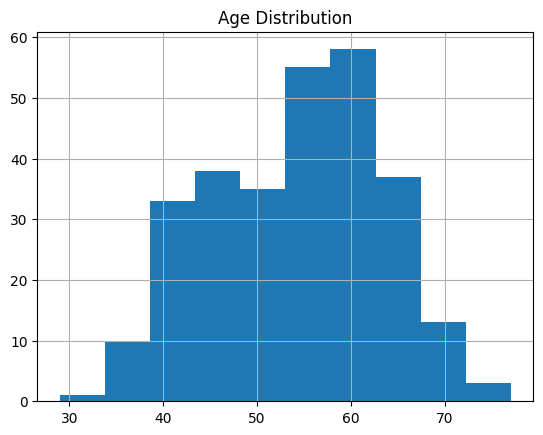

In [ ]:
print(df_no_dup.age.value_counts())

df_no_dup['age'].hist().plot(kind='bar')
plt.title('Age Distribution')

0    130
2     82
1     49
3     22
Name: cp, dtype: int64


Text(0.5, 1.0, 'Chest Pain Distribution')

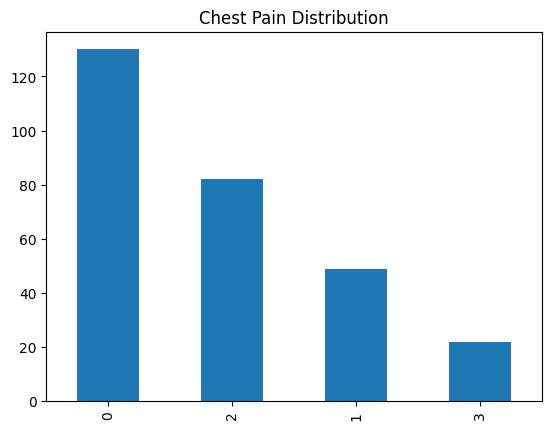

In [ ]:
print(df_no_dup.cp.value_counts())
df_no_dup['cp'].value_counts().plot(kind='bar').set_title('Chest Pain Distribution')

### Correlation

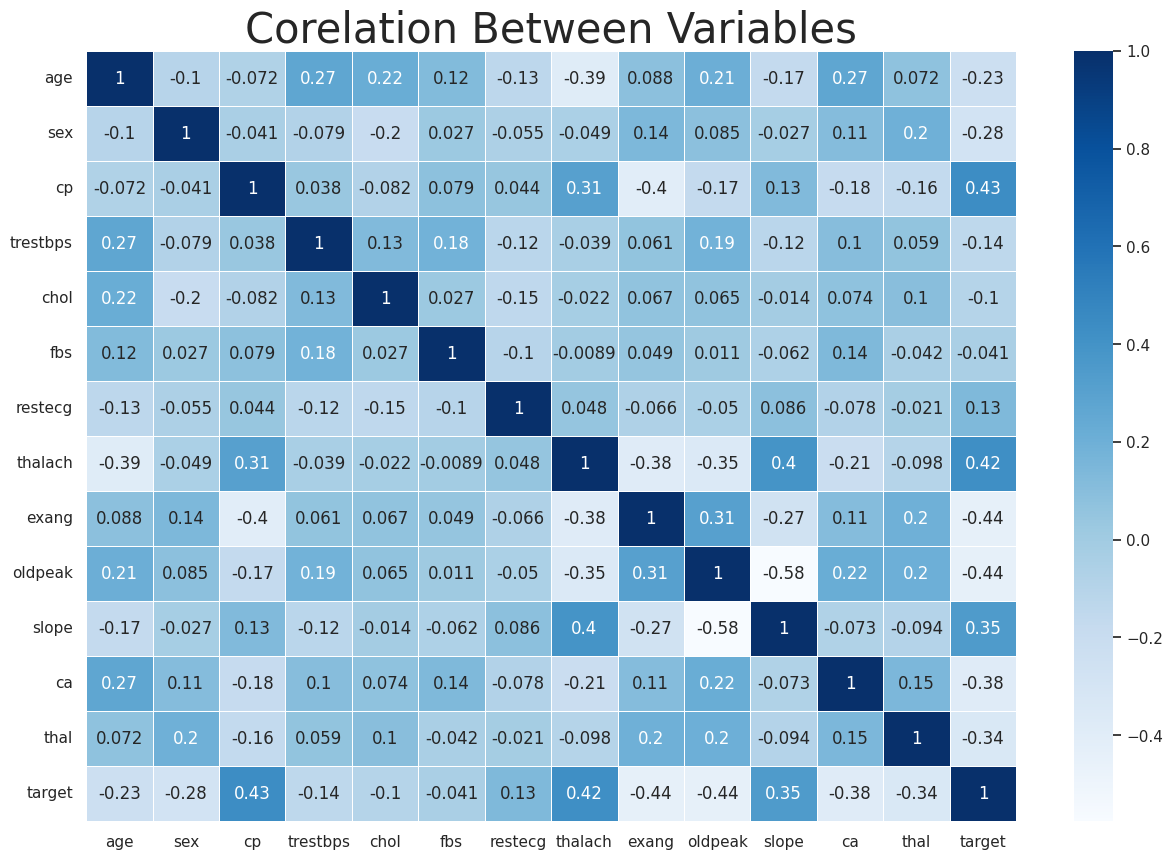

In [ ]:
sns.set(style="white")
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

# **ASSIGNMENT 4**

**Problem**: Mengetahui apakah pasien masuk dalam kategori terindikasi terkena penyakit jantung atau tidak? (klasifikasi)

NB: untuk memulai menjalankan assignment 4 ini, saya tidak menjalankan keseluruhan code pada python ini, melainkan hanya beberapa sub yang diperlukan

Meliputi: pada code aasignment 3 hanya sub (import library, load dataframe, data preparation) kemudian dilanjutkan di keseluruhan code assignment 4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [ ]:
# Memasukkan kembali feature 'target' ke dalam dataframe setelah handling outlier
df2['target'] = df_no_dup['target']
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Eksplorasi Statistik Deskriptif

Eksplorasi statistik deskriptif hanya dilakukan untuk menemukan hubungan antara target dengan beberapa fitur dasar lainnya, seperti jenis kelamin dan rentang usia

In [ ]:
df2.target.value_counts()

1    158
0    125
Name: target, dtype: int64

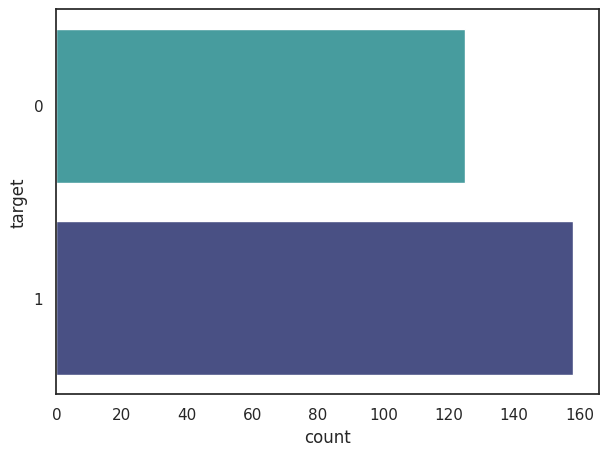

In [ ]:
# Visualisasi target
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(y="target", data=df2, palette="mako_r");

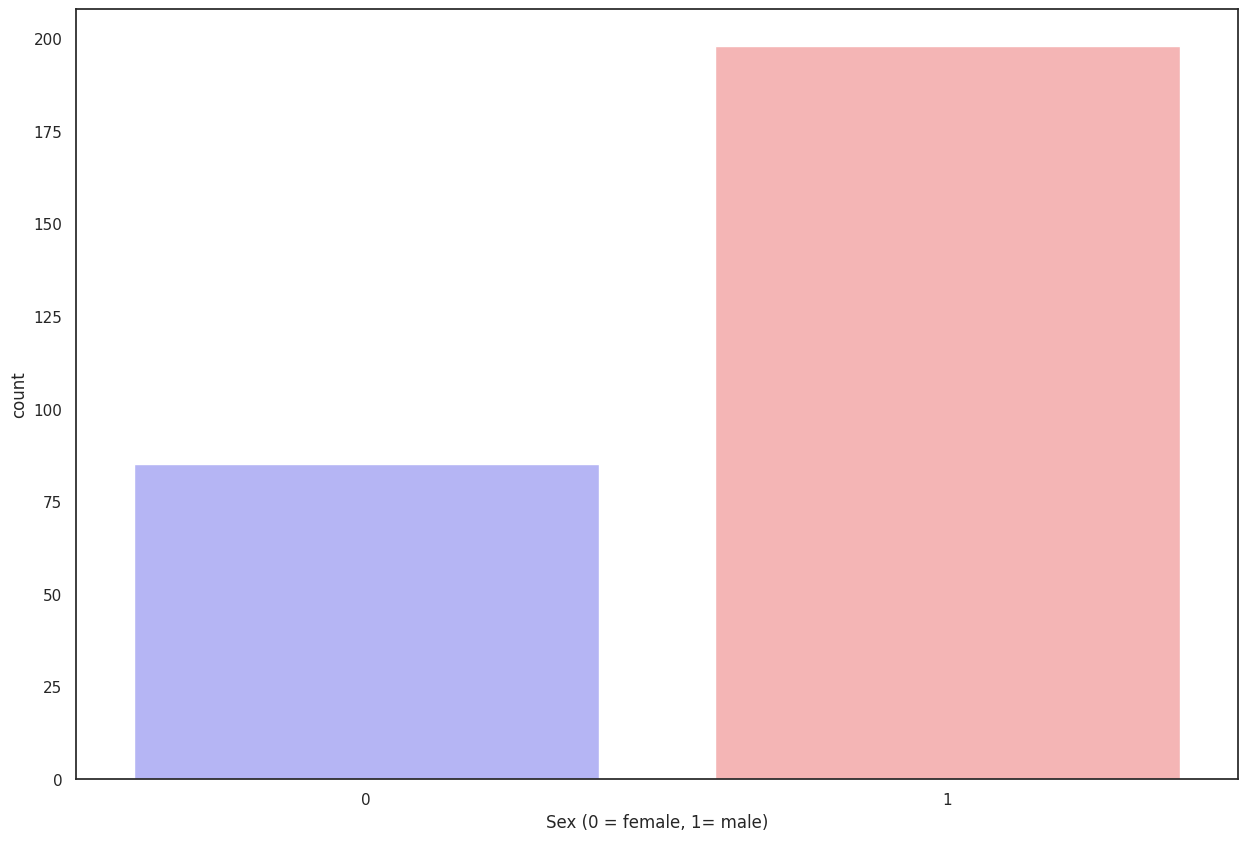

In [ ]:
sns.countplot(x='sex', data=df2, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

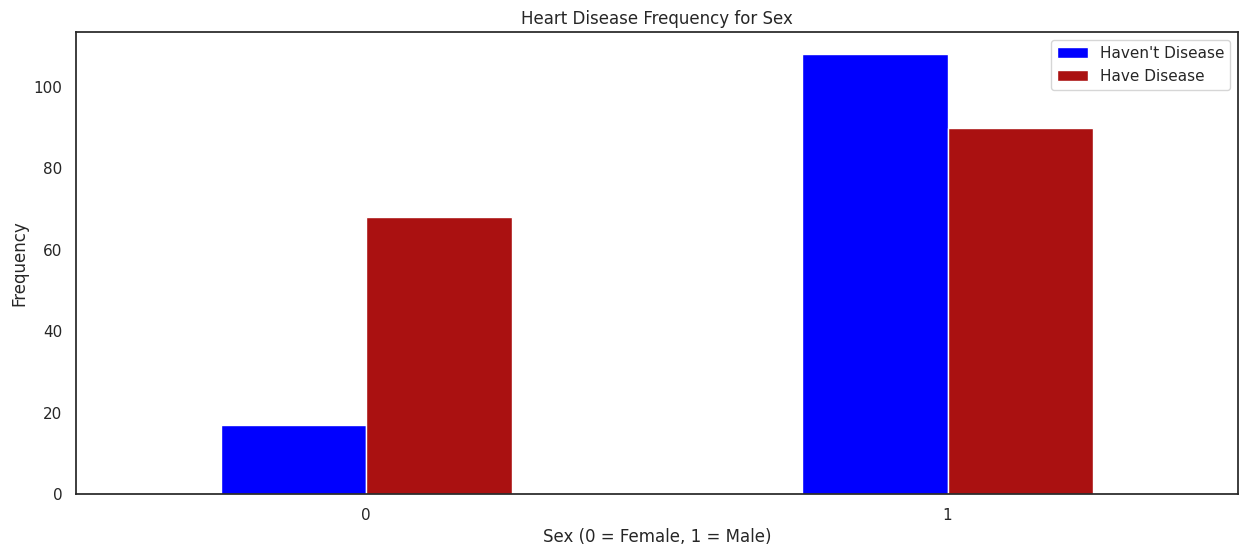

In [ ]:
# mengetahui frequency indikasi pasien berdasarkan jenis kelaminnya
pd.crosstab(df2.sex,df2.target).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

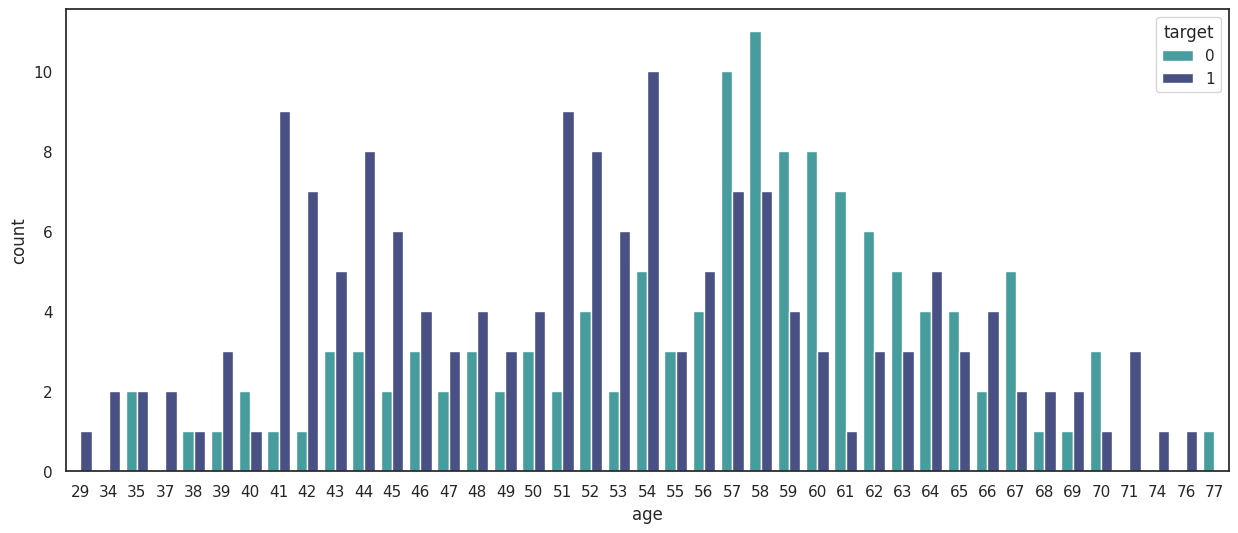

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df2, hue = 'target',palette='mako_r')
plt.show()

Diketahui pasien yang terindikasi memiliki penyakit jantung terbanyak ada pada pasien usia 54 tahun, dan dapat dilihat pola bahwasannya mulai dari usia >40 tahun pasien pengidap penyakit jantung bertambah semakin banyak.

# Modeling

Algoritma yang dipilih untuk melakukan modeling pada dataset ini adalah Random Forest. Alasannya karena selain algoritma ini memiliki performa yang bagus, pada algoritma ini juga sudah disediakan kemampuan untuk menemukan sebuah feature importance dari sebuah dataset

In [ ]:
X = df2.drop('target', axis=1)
y = df2['target']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi model Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Melatih model menggunakan data latih
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Melakukan prediksi pada data uji
predictions = random_forest.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, predictions)
print(f'Akurasi: {accuracy:.2f}')

# Menampilkan laporan klasifikasi
print('Laporan Klasifikasi:')
print(classification_report(y_test, predictions))

Akurasi: 0.86
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.85      0.90      0.88        31

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57



# Feature Importance

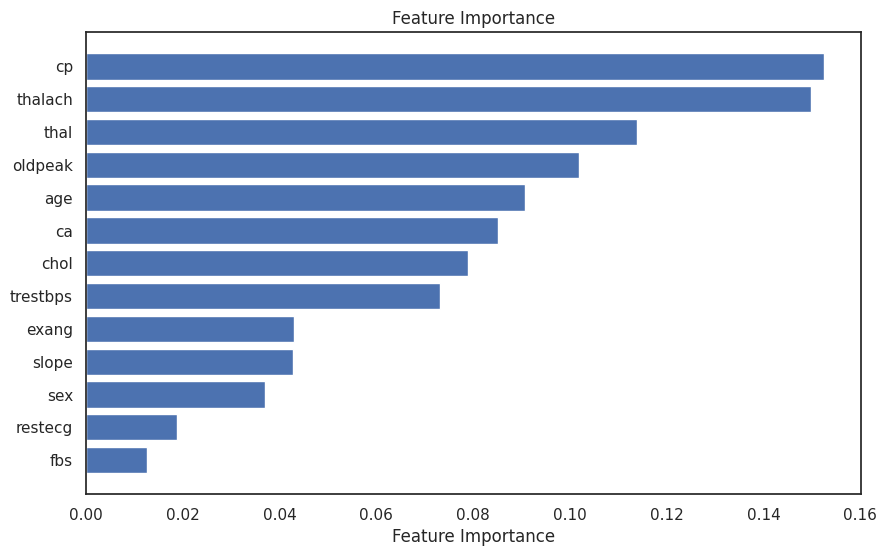

In [ ]:
# Mendapatkan feature importance
feature_importance = random_forest.feature_importances_

# Mendapatkan nama-nama fitur
features = X.columns

# Mengurutkan indeks fitur berdasarkan feature importance
sorted_indices = np.argsort(feature_importance)
sorted_feature_importance = feature_importance[sorted_indices]
sorted_features = features[sorted_indices]

# Membuat grafik batang
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), sorted_feature_importance, align='center')
plt.yticks(range(len(features)), sorted_features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
# Tentukan ambang batas untuk feature importance
threshold = 0.09

# Mengambil indeks fitur yang memiliki feature importance di atas ambang batas
important_feature_indices = np.where(feature_importance > threshold)[0]

# Memilih hanya fitur-fitur yang memiliki feature importance di atas ambang batas
X_train_selected = X_train.iloc[:, important_feature_indices]
X_test_selected = X_test.iloc[:, important_feature_indices]

# Melatih ulang model hanya dengan fitur yang penting
model_selected_features = RandomForestClassifier(random_state=42)
model_selected_features.fit(X_train_selected, y_train)

# Memprediksi menggunakan model yang hanya menggunakan fitur yang penting
y_pred = model_selected_features.predict(X_test_selected)

# Mengukur akurasi model yang hanya menggunakan fitur yang penting
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model dengan fitur yang penting:", accuracy)

Akurasi model dengan fitur yang penting: 0.7368421052631579


**Kesimpulan**: Meskipun nilai akurasi dari model dengan feature importance jauh lebih kecil, tidak dapat dikatakan bahwasannya performa model dengan hanya menggunakan beberapa subset tidak optimal.

Justru, dengan akurasi 0.736…. merupakan jumlah akurasi yang cukup optimal. Mengingat bahwasannya feature yang digunakan hanya mengambil 5 subset teratas. Hal ini berarti, dengan hanya melalui 5 feature tersebut, sebuah model dapat memprediksi dengan baik apakah seseorang dapat diklasifikasikan memiliki penyakit jantung atau tidak.


# Perbandingan dengan Algoritma lainnya

**Hanya Percobaan**
Jalankan sel ini diluar sel modeling menggunakan random forest dan feature importance, karena perhitungan akurasinya akan berhubungan apabila dijalankan bersamaan/berurutan, sehingga hasil akurasi tidak akan konsisten dan membingungkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
%matplotlib inline

In [ ]:
# Variabel independen
x = df2.drop(["target"], axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [ ]:
# Variabel dependen
y = df2["target"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [ ]:
modelnb = GaussianNB()
modelnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Membuat prediksi menggunakan data uji
y_pred = modelnb.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Naive Bayes:", accuracy)

# Mencetak laporan klasifikasi
print(classification_report(y_test, y_pred))

Akurasi model Naive Bayes: 0.40350877192982454
              precision    recall  f1-score   support

           0       0.32      0.32      0.32        25
           1       0.47      0.47      0.47        32

    accuracy                           0.40        57
   macro avg       0.39      0.39      0.39        57
weighted avg       0.40      0.40      0.40        57



Dapat dilihat bahwasannya nilai akurasi yang dihasilkan oleh algoritma naive bayes sangat kecil, berbanding terbalik dengan algoritma Random Forest.

Berdasarkan hal tersebut, pada assignment kali ini pertimbangan model yang saya gunakan adalah Random Forest, karena nilai akurasi yang dihasilkan jauh lebih besar

# **ASSIGNMENT 5**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import linear_model, tree, ensemble

## Perbandingan Model Dec Tree dan Random Forest

In [ ]:
X = df2.drop('target', axis=1)
y = df2['target']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Modeling

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

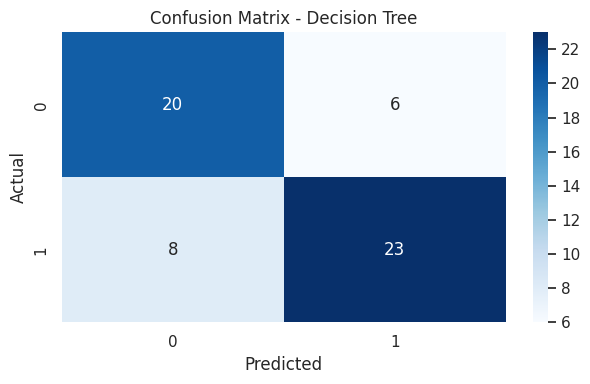

In [ ]:
y_pred = dtc.predict(X_test)

# Menghitung confusion matrix untuk Decision Tree
cm_dtc = confusion_matrix(y_test, y_pred)

# Menampilkan visualisasi (heatmap)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
# Membuat prediksi menggunakan data uji
y_pred = dtc.predict(X_test)

# Mengukur performa model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Menampilkan laporan klasifikasi
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Accuracy:  0.7543859649122807
Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        26
           1       0.79      0.74      0.77        31

    accuracy                           0.75        57
   macro avg       0.75      0.76      0.75        57
weighted avg       0.76      0.75      0.75        57



### Random Forest Modeling

In [ ]:
# Inisialisasi model Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Melatih model menggunakan data latih
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

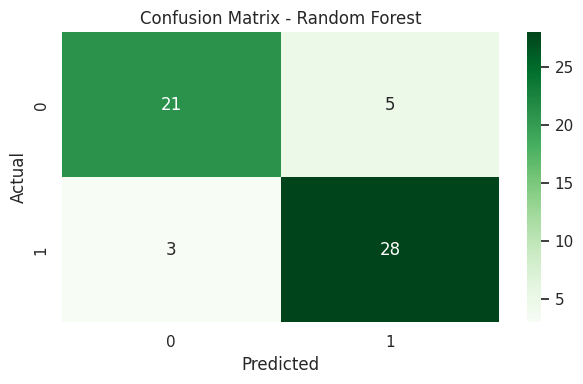

In [ ]:
# Menggunakan model Random Forest yang telah dilatih sebelumnya
predictions = random_forest.predict(X_test)

# Menghitung confusion matrix untuk Random Forest
cm_rfc = confusion_matrix(y_test, predictions)

# Menampilkan visualisasi (heatmap)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Greens', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
# Melakukan prediksi pada data uji
predictions = random_forest.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, predictions)
print(f'Akurasi: {accuracy:.2f}')

# Menampilkan laporan klasifikasi
print('Laporan Klasifikasi:')
print(classification_report(y_test, predictions))

Akurasi: 0.86
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.85      0.90      0.88        31

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57



## Cross Validation

In [ ]:
# split the data into 5 folds.
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 226, Test set:57
Fold:2, Train set: 226, Test set:57
Fold:3, Train set: 226, Test set:57
Fold:4, Train set: 227, Test set:56
Fold:5, Train set: 227, Test set:56


In [ ]:
# Decision Tree Cross-Validation
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.84210526 0.64912281 0.71929825 0.78571429 0.71428571]
Average score: 0.74


In [ ]:
# Random Forest Cross-Validation
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.8245614  0.77192982 0.8245614  0.92857143 0.80357143]
Average score: 0.83


## Hyperparameter Tuning

In [ ]:
# Inisialisasi list untuk menyimpan skor cross-validation
cross_val_scores = []

# Decision Tree Classifier Tuning
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

best_max_depth = None
best_score = 0

for val in max_depth:
    # Menghitung skor cross-validation untuk setiap max_depth
    score = cross_val_score(DecisionTreeClassifier(max_depth=val, random_state=42), X, y, cv=kf, scoring="accuracy")
    average_score = score.mean()
    print(f'Average score({val}): {"{:.3f}".format(average_score)}')

    # Membandingkan dengan skor terbaik sejauh ini
    if average_score > best_score:
        best_score = average_score
        best_max_depth = val

# Menampilkan max_depth terbaik dan skornya
print(f'Best max_depth: {best_max_depth}')
print(f'Best Average Score: {"{:.3f}".format(best_score)}')

Average score(1): 0.742
Average score(2): 0.753
Average score(3): 0.806
Average score(4): 0.781
Average score(5): 0.760
Average score(6): 0.742
Average score(7): 0.739
Average score(8): 0.739
Average score(9): 0.742
Average score(10): 0.742
Best max_depth: 3
Best Average Score: 0.806


In [ ]:
# Rentang nilai n_estimators yang akan dicoba
n_estimators_values = [50, 100, 150, 200, 250]

best_n_estimators = None
best_score = 0

# Melakukan eksperimen untuk setiap nilai n_estimators
for n_estimators in n_estimators_values:
    # Menggunakan 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Inisialisasi Random Forest Classifier dengan n_estimators tertentu
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Menghitung skor cross-validation untuk model dengan n_estimators saat ini
    scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring='accuracy')

    # Menghitung rata-rata skor cross-validation
    average_score = scores.mean()
    print(f'Average score({n_estimators}): {"{:.3f}".format(average_score)}')

    # Membandingkan dengan skor terbaik sejauh ini
    if average_score > best_score:
        best_score = average_score
        best_n_estimators = n_estimators

# Menampilkan n_estimators terbaik dan skornya
print(f'Best estimators: {best_n_estimators}')
print(f'Best Average Score: {"{:.3f}".format(best_score)}')

Average score(50): 0.820
Average score(100): 0.827
Average score(150): 0.816
Average score(200): 0.827
Average score(250): 0.820
Best estimators: 100
Best Average Score: 0.827


## Learning Curves

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

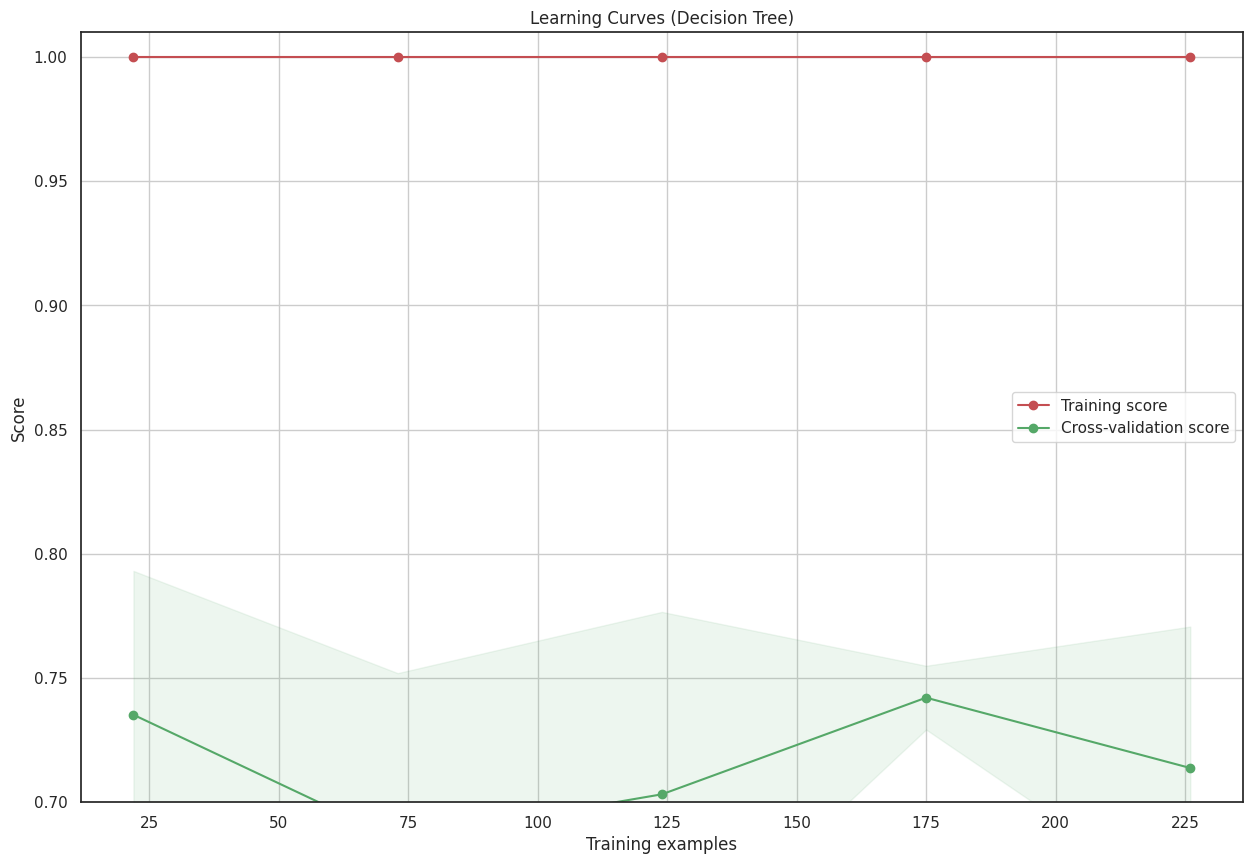

In [ ]:
# Plot Decision Tree learning curve
title = "Learning Curves (Decision Tree)"
cv = 5
plot_learning_curve(dtc, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

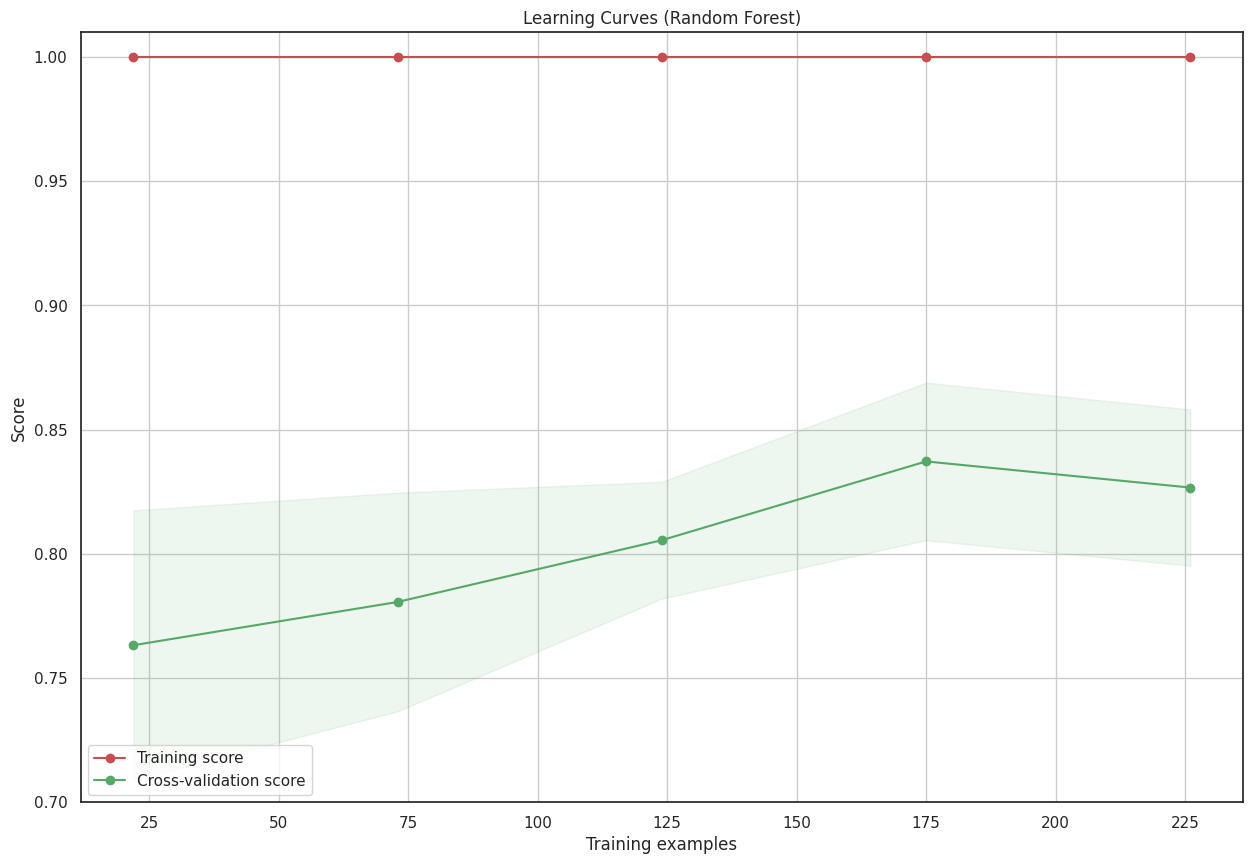

In [ ]:
# Plot Random Forest learning curve
title = "Learning Curves (Random Forest)"
plot_learning_curve(random_forest, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

## Curve ROC AUC

In [ ]:
# Decision Tree
# Menggunakan probabilitas positif sebagai nilai untuk kurva ROC
y_scores_dt = dtc.predict_proba(X_test)[:, 1]

# Menghitung nilai false positive rate (fpr) dan true positive rate (tpr) untuk kurva ROC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_scores_dt)

# Menghitung AUC (Area Under the Curve) untuk Decision Tree
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [ ]:
# Random Forest
# Menggunakan probabilitas positif sebagai nilai untuk kurva ROC
y_scores_rf = random_forest.predict_proba(X_test)[:, 1]

# Menghitung nilai false positive rate (fpr) dan true positive rate (tpr) untuk kurva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)

# Menghitung AUC (Area Under the Curve) untuk Random Forest
roc_auc_rf = auc(fpr_rf, tpr_rf)

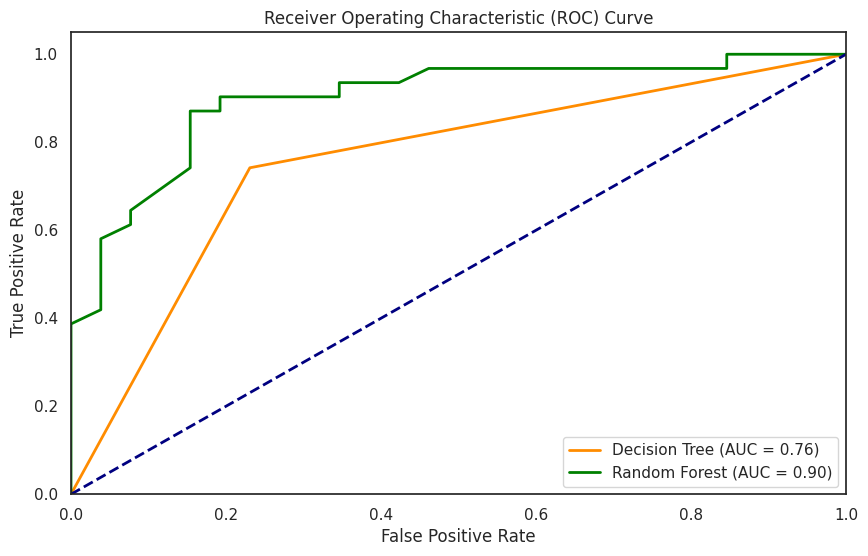

In [ ]:
# Plot kurva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()